## 1. Customer Segmentation
<p><em>These recommendations are so on point! How does this know me so well?</em></p>
<p><img src="https://www.smartkarrot.com/wp-content/uploads/2020/04/Customer-segmentation-and-campaigns.png" alt="Project Image Record" width="600px"></p>
<p>Segmentation refers to the division of a market or service on the basis of various features that bind every group together. <code>Customer Segments</code> are groups of customers that share common characteristics like industry, number of employees, products, location, etc for B2B marketing and gender, age, preferences, demographics, etc for the B2C market. These segments are then treated with different engagement strategies. </p>
<p>The technique of customer segmentation is dependent on several key differentiators that divide customers into groups to be targeted. Data related to demographics, geography, economic status as well as behavioral patterns play a crucial role in determining the company direction towards addressing the various segments.</p>

<p>Below points will be implemented:</p>
<p>1. Import a CSV file into a Pandas DataFrame</p>
<p>2. Merge DataFrames</p>
<p>3. NumPy</p>
<p>4. Dictionary or Lists</p>
<p>5. Present charts with Seaborn or Matplotlib</p>
<p>6. Usage of Unsupervised Learning</p>
<p>7. insights from the project</p>

<p>In the first step of this data science project, we will perform data exploration. We will import the essential packages required for this role and then read our data. Finally, we will go through the input data to gain necessary insights about it.</p>
<p>Let's start by creating two pandas <code>DataFrames</code> out of these files that we can merge so we have features and labels (often also referred to as <code>X</code> and <code>y</code>) for the classification later on.</p>

In [881]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 ### 2. Import CSV file into Pandas Dataframe

In [882]:
df_cust=pd.read_csv('Mall_Customers.csv')

In [883]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [884]:
df_cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [885]:
df_cust.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 3. Check for Missing values in columns of Dataframe

<p> If our dataset consists of missing values then below two strategies can be followed: </p>
    <p>1. <u>For Numeric Columns</u> : Replace NaN values with mean values. This is known as <b> Mean Imputation </b></p>
    <p>2. <u>For Non-Numeric Columns</u> : Mean imputation strategy would not work here.We are going to impute these missing values with the most frequent values as present in the respective columns</p>

In [886]:
df_cust.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [887]:
df_cust.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Since there are no null values in dataset, we are not required to replace missing values. In case of <b>Mean imputation</b>, we would use the below mean values to replace with the missing values

In [888]:
np.mean(df_cust)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

### In case of <u>Non Numerical column</u>, we can choose the most frequent value of that column using the below, and replace the Null values

In [889]:
df_cust['Genre'].value_counts().index[0]

'Female'

In [890]:
df_cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [891]:
df_cust[['CustomerID','Genre']].groupby('Genre').count()

,CustomerID
Genre,
Female,112
Male,88


In [892]:
df_cust['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

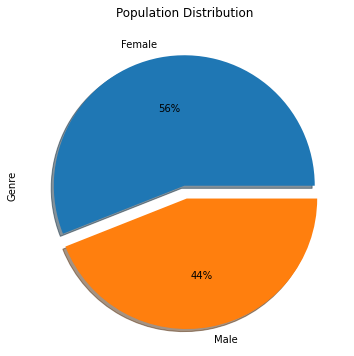

In [893]:
plt.figure(figsize=(6,6))
df_cust['Genre'].value_counts().plot(kind='pie',autopct='%1.0f%%',shadow=True,explode=[0,0.1])
plt.title('Population Distribution')
plt.show()

In [894]:
df_cust_male=df_cust[df_cust['Genre']=='Male']
df_cust_female=df_cust[df_cust['Genre']=='Female']

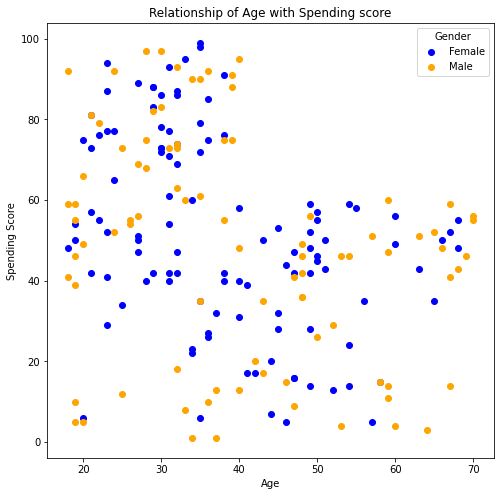

In [895]:
plt.figure(figsize=(8,8))
plt.scatter(df_cust_female['Age'],df_cust_female['Spending Score (1-100)'],c='blue',label='Female')
plt.scatter(df_cust_male['Age'],df_cust_male['Spending Score (1-100)'],c='orange',label='Male')
plt.legend(title='Gender')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Relationship of Age with Spending score')
plt.show()

### Implementation of resuable function for boxplot

In [896]:
def boxplot(frame,x,y,*args):
    '''This function helps to plot the boxplot
    frame : dataframe to be used
    x     : dataframe column for x axis
    y     : dataframe column for y axis
    *args : to include more features like Title, palette, notch'''
    
    plt.figure(figsize=(8,8))
    bp=sns.boxplot(data=frame,x=x,y=y,palette=args[0],notch=args[1])
    medians = frame.groupby([x])[y].median().sort_values(ascending=False)
    vertical_offset = frame[y].median() * 0.01 # offset from median for display

    for xtick in bp.get_xticks():
        bp.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                horizontalalignment='center',size='medium',color='blue',weight='semibold')
    plt.title(args[2])
    plt.grid()
    plt.show() 

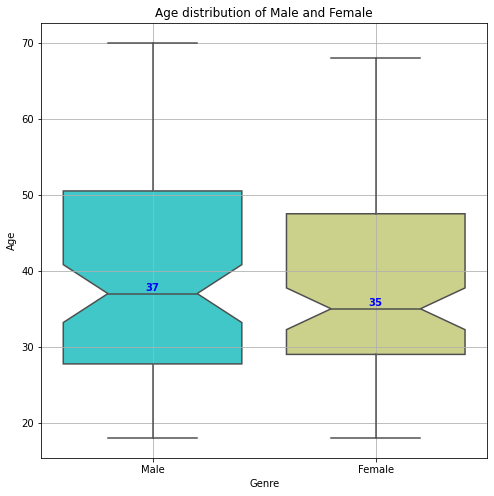

In [897]:
boxplot(df_cust,'Genre','Age','rainbow',True,'Age distribution of Male and Female')

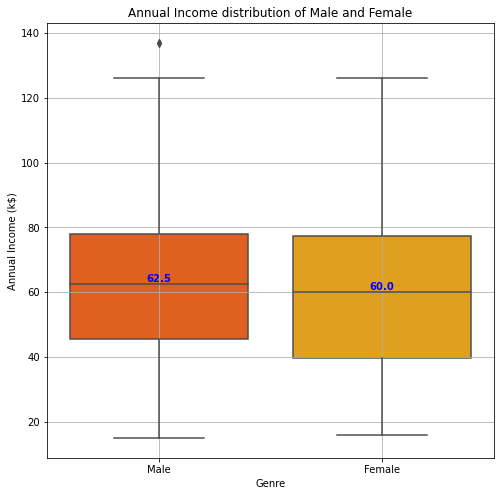

In [898]:
boxplot(df_cust,'Genre','Annual Income (k$)','autumn',False,'Annual Income distribution of Male and Female')

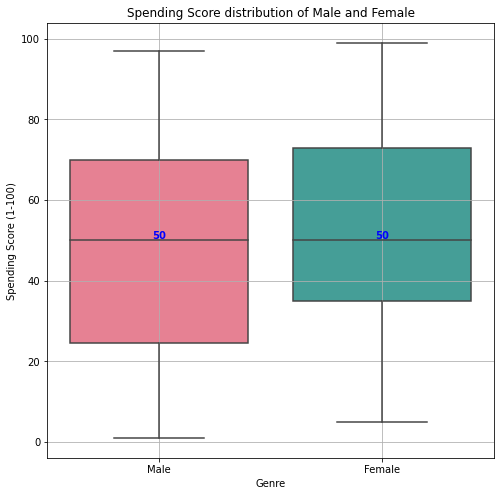

In [899]:
boxplot(df_cust,'Genre','Spending Score (1-100)','husl',False,'Spending Score distribution of Male and Female')

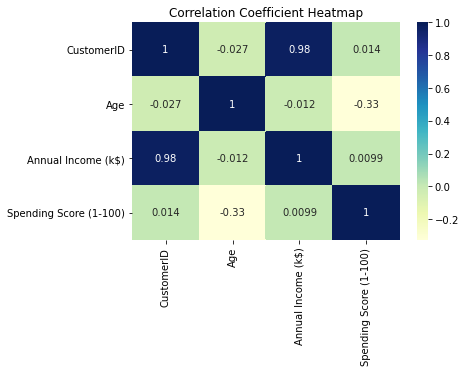

In [900]:
sns.heatmap(df_cust.corr(),cmap="YlGnBu", annot=True)
plt.title('Correlation Coefficient Heatmap')
plt.show()

## Insights on Mall Customers data:

1. Total 200 rows and 5 columns, with 1 column as String, and 4 columns as integer
2. Minimum Age : 18; Maximum Age : 70; Average Age : ~39
3. Number of Females : 112 (56%); Number of Males : 88 (44%)
4. Median age of males is 37, and females is 35
5. Annual income of Males is more than Females
6. Spending Score decreases with Age; Females have more spending score than males in the age group of 60-70 years

## Created a new Dataframe df_genre, and apply Merge on Dataframes

In [901]:
df_genre=pd.DataFrame({'Genre':['Female','Male'],'Genre_code':[0,1]})

In [902]:
df_genre.head()

,Genre,Genre_code
0,Female,0
1,Male,1


In [903]:
# Merge two dataframes

df_cust=df_cust.merge(df_genre,on='Genre')

In [904]:
df_cust['Genre_code'].value_counts()

0    112
1     88
Name: Genre_code, dtype: int64

In [905]:
df_cust.drop('Genre',axis=1,inplace=True) # Drop the column 'Genre' as only numerical columns will be used in model.

In [906]:
df_cust.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_code'],
      dtype='object')

In [907]:
df_cust.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_code
0,1,19,15,39,1
1,2,21,15,81,1
2,9,64,19,3,1
3,11,67,19,14,1
4,15,37,20,13,1


In [908]:
df_cust.drop('CustomerID',axis=1,inplace=True) # Drop column 'CustomerID' as it is not required for model. 

In [909]:
df_cust.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_code
0,19,15,39,1
1,21,15,81,1
2,64,19,3,1
3,67,19,14,1
4,37,20,13,1


## Apply KMeans Clustering Algorithm on dataframe

In [910]:
from sklearn.cluster import KMeans

In [911]:
model=KMeans(n_clusters=4)

In [912]:
model.fit(df_cust)

KMeans(n_clusters=4)

In [913]:
labels=model.predict(df_cust)

In [914]:
labels

array([2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0])

In [915]:
np.unique(labels)

array([0, 1, 2, 3])

In [916]:
model.cluster_centers_

array([[40.39473684, 87.        , 18.63157895,  0.52631579],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [24.82142857, 28.71428571, 74.25      ,  0.5       ],
       [44.89473684, 48.70526316, 42.63157895,  0.37894737]])

In [917]:
model.inertia_

104414.67534220168

# Visualising with Matplotlib and Seaborn

In [918]:
df_cust['Labels']=labels

In [919]:
df_cust.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_code,Labels
0,19,15,39,1,2
1,21,15,81,1,2
2,64,19,3,1,3
3,67,19,14,1,3
4,37,20,13,1,3


In [920]:
xs=df_cust['Annual Income (k$)']

In [921]:
ys=df_cust['Spending Score (1-100)']

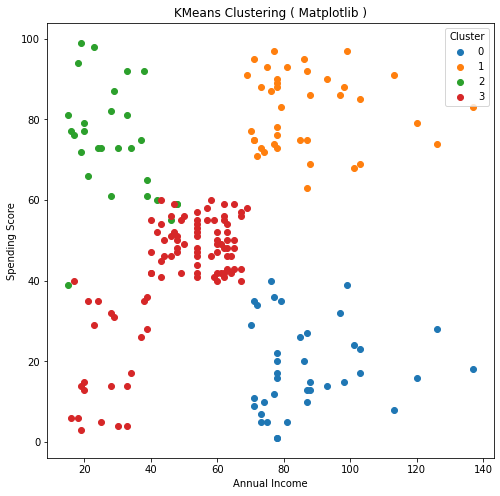

In [922]:
#Scatter plot using matplotlib

plt.figure(figsize=(8,8))
for i in np.unique(labels):
    plt.scatter(df_cust['Annual Income (k$)'][df_cust['Labels']==i],df_cust['Spending Score (1-100)'][df_cust['Labels']==i])
#plt.scatter(xs,ys,c=labels)
plt.legend(np.unique(labels),title='Cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering ( Matplotlib )')
plt.show()

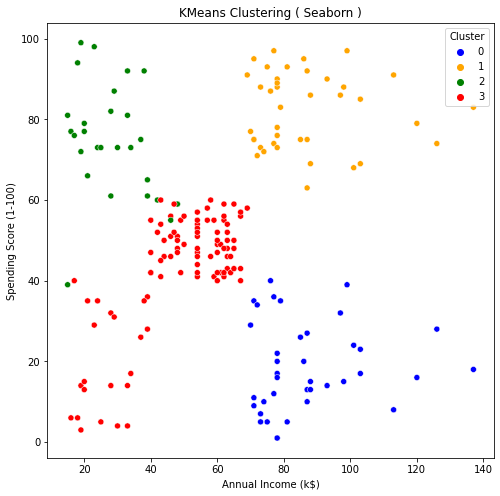

<Figure size 576x576 with 0 Axes>

In [923]:
# Scatter plot using Seaborn

plt.figure(figsize=(8,8))
sns.scatterplot(x=xs,y=ys,hue=labels,palette=['blue','orange','green','red']).set(title='KMeans Clustering ( Seaborn )')
plt.legend(title='Cluster')
plt.figure(figsize=(8,8))
plt.show()

## Applying Principal Component Analysis (PCA) before using KMeans

In [924]:
from sklearn.decomposition import PCA

In [925]:
pca=PCA()

In [926]:
pca.fit(df_cust)

PCA()

In [927]:
pca.n_components_

5

In [928]:
features=range(pca.n_components_)

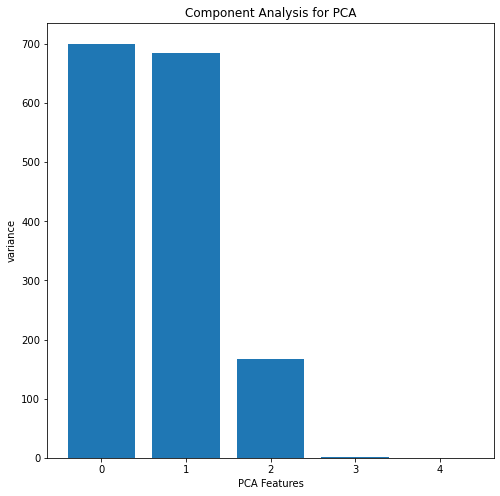

In [929]:
plt.figure(figsize=(8,8))
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('variance')
plt.title('Component Analysis for PCA')
plt.show()

### The above plot shows that 2 features cover the maximum variance, hence 2 principal components can be used to represent the dataset

In [930]:
pca=PCA(n_components=2)

In [931]:
pca.fit(df_cust)

PCA(n_components=2)

In [932]:
transformed=pca.transform(df_cust)

In [933]:
print(transformed.shape)

(200, 2)


### Perform KMeans clustering with 4 clusters on PCA components

In [934]:
km=KMeans(n_clusters=4,random_state=42)
km.fit(transformed)

KMeans(n_clusters=4, random_state=42)

In [935]:
df_pca_kmeans=pd.concat([df_cust,pd.DataFrame(transformed)],axis=1)

In [936]:
df_pca_kmeans.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_code,Labels,0,1
0,19,15,39,1,2,-32.455595,-32.394271
1,21,15,81,1,2,-0.262964,-56.829392
2,64,19,3,1,3,-66.373704,-2.017585
3,67,19,14,1,3,-58.404529,-8.084938
4,37,20,13,1,3,-52.976781,-10.725858


In [937]:
df_pca_kmeans.columns.values[-2:]=['Component1','Component2']

In [938]:
df_pca_kmeans['KMeans_Label']=km.labels_
x_c=km.cluster_centers_[:,0]  # X-cords for centroid
y_c=km.cluster_centers_[:,1]  # Y-cords for centroid

In [939]:
df_pca_kmeans['KMeans_Label'].value_counts()

1    105
0     39
3     34
2     22
Name: KMeans_Label, dtype: int64

In [940]:
print(km.inertia_)

74639.83116755096


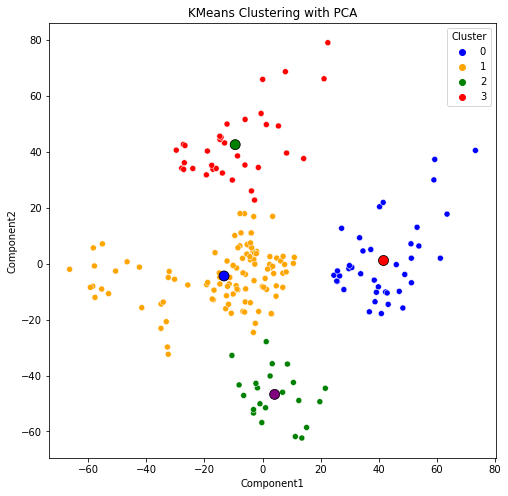

In [941]:
x=df_pca_kmeans['Component1']
y=df_pca_kmeans['Component2']
plt.figure(figsize=(8,8))
sns.scatterplot(x=x,y=y,hue=df_pca_kmeans['KMeans_Label'],palette=['blue','orange','green','red'])
sns.scatterplot(x=x_c,y=y_c, s=100,linewidths = 50,hue=range(4),palette=['red', 'blue', 'purple', 'green'],ec='black', legend=False)
plt.legend(title='Cluster')
plt.title('KMeans Clustering with PCA')
plt.show()

# Applying Standardization and PCA on dataset, before using KMeans

In [942]:
df_customers=pd.read_csv('Mall_Customers.csv')

In [943]:
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [944]:
from sklearn.preprocessing import StandardScaler

In [945]:
scaler=StandardScaler()

In [946]:
#need to convert 'Genre' column into integer
df_customers_new=df_customers.merge(df_genre, on='Genre')

In [947]:
df_customers_new.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_code
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,9,Male,64,19,3,1
3,11,Male,67,19,14,1
4,15,Male,37,20,13,1


In [948]:
df_customers_new.drop('Genre',axis=1,inplace=True)

In [949]:
scaled_data=scaler.fit_transform(df_customers_new)

In [950]:
np.mean(scaled_data)

-6.750155989720952e-17

In [951]:
np.std(scaled_data)

1.0

In [952]:
pca1=PCA()

In [953]:
pca1.fit(scaled_data)

PCA()

In [954]:
pca1.explained_variance_

array([1.99507004, 1.35420929, 0.97725931, 0.67613098, 0.02245601])

In [955]:
pca1.explained_variance_ratio_

array([0.39701894, 0.26948765, 0.1944746 , 0.13455007, 0.00446875])

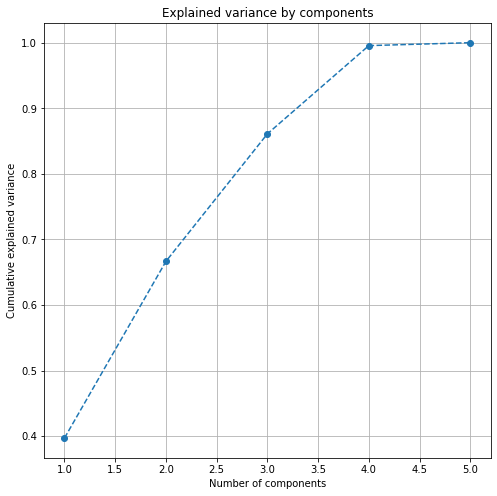

In [956]:
#plt.figure(figsize=(10,6))
plt.figure(figsize=(8,8))
plt.plot(range(1,6),pca1.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.grid()
plt.show()

From the above plot, we can observe that 80% variance is explained by 2 components, hence we take two principal components.

In [957]:
pca2=PCA(n_components=2)
pca2.fit(scaled_data)
scores_pca=pca2.transform(scaled_data)

In [958]:
wcss=[] # list to store within cluster sum of squares
for i in range(1,20):
    kmeans_pca=KMeans(n_clusters=i,random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    

In [959]:
wcss

[666.5065869634224,
 385.6270335084618,
 264.2784589214622,
 175.93286483235164,
 135.94379609345728,
 111.52482520602273,
 96.84709551411156,
 85.4240313358027,
 74.93196812915876,
 66.51208146368644,
 60.18330336712561,
 53.836473475048464,
 49.551727410936145,
 46.110325094622546,
 41.910754075227764,
 38.63064798537609,
 35.89133550699827,
 33.303112996311015,
 31.244132603641606]

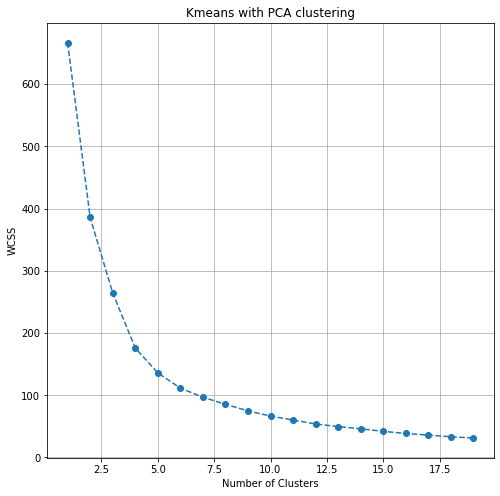

In [960]:
#plt.figure(figsize=(10,8))
plt.figure(figsize=(8,8))
plt.plot(range(1,20),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA clustering')
plt.grid()
plt.show()

From the above plot, we can observe that the elbow comes at around cluster 4 and 5. We move forward by taking 4 cluster.

In [961]:
kmeans_pca=KMeans(n_clusters=4,random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [962]:
df_pca_new=pd.concat([df_customers_new,pd.DataFrame(scores_pca)],axis=1)

In [963]:
df_pca_new.columns.values[-2:]=['Component1','Component2']

In [964]:
df_pca_new.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_code,Component1,Component2
0,1,19,15,39,1,-2.316965,-0.454190
1,2,21,15,81,1,-2.272391,-1.474104
2,9,64,19,3,1,-2.242366,2.726501
3,11,67,19,14,1,-2.214930,2.581676
4,15,37,20,13,1,-2.074081,1.130788


In [965]:
df_pca_new['Segment_PCA']=kmeans_pca.labels_
x_c=kmeans_pca.cluster_centers_[:,0]  # X-cords for centroid
y_c=kmeans_pca.cluster_centers_[:,1]  # Y-cords for centroid

In [966]:
df_pca_new.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_code,Component1,Component2,Segment_PCA
0,1,19,15,39,1,-2.316965,-0.454190,3
1,2,21,15,81,1,-2.272391,-1.474104,3
2,9,64,19,3,1,-2.242366,2.726501,1
3,11,67,19,14,1,-2.214930,2.581676,1
4,15,37,20,13,1,-2.074081,1.130788,1


In [967]:
# Number of customers in each cluster

df_pca_new['Segment_PCA'].value_counts().sort_index()

0    60
1    63
2    35
3    42
Name: Segment_PCA, dtype: int64

In [968]:
df_pca_new['Segment']=df_pca_new['Segment_PCA'].map({0:'First',1:'Second',2:'Third',3:'Fourth'})

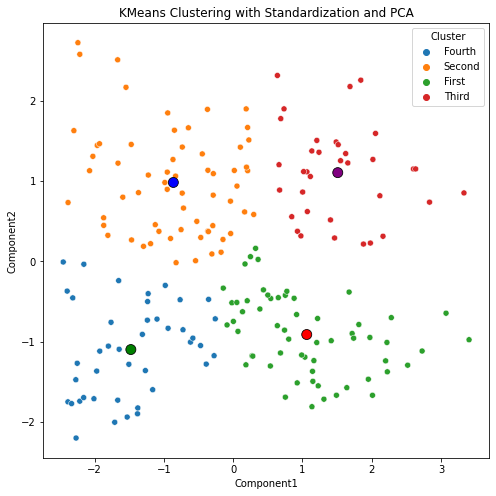

In [969]:
x=df_pca_new['Component1']
y=df_pca_new['Component2']
plt.figure(figsize=(8,8))
sns.scatterplot(x=x,y=y,hue=df_pca_new['Segment'])
sns.scatterplot(x=x_c,y=y_c, s=100,linewidths = 50,hue=range(4),palette=['red', 'blue', 'purple', 'green'],ec='black', legend=False)
plt.legend(title='Cluster')
plt.title('KMeans Clustering with Standardization and PCA')
plt.show()

In [970]:
print(kmeans_pca.inertia_)

175.93286483235164


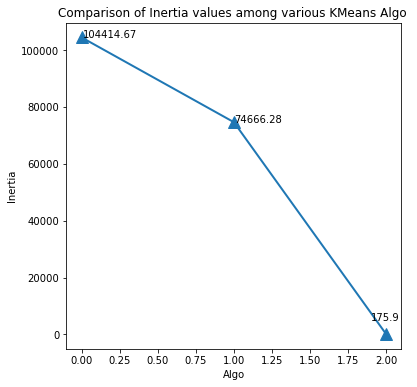

In [971]:
plt.figure(figsize=(6,6))
plt.plot([model.inertia_,km.inertia_,kmeans_pca.inertia_],'^-',linewidth=2, markersize=12)
plt.annotate('104414.67',xy=(0.01,104414.67534220168))
plt.annotate('74666.28',xy=(1,74666.28056871759))
plt.annotate('175.9',xy=(1.9,5000))
plt.title('Comparison of Inertia values among various KMeans Algo ')
plt.xlabel('Algo')
plt.ylabel('Inertia')
plt.show()

## Insights using KMeans(4 clusters) before and after Standardization and PCA on Dataset

 1. The inertia of KMeans model before applying standardization and PCA comes out to be a large value: <b>104414.67534220168</b>
 2. The inertia of KMeans model after applying PCA comes out to be a large value: <b>74666.28056871759</b>
 3. <span style="color:red">The inertia of KMeans model after standardizing the data and applying PCA comes out to be a small value: <b><u>175.93286483235164</u></b></span>
 
 <table ><tr><th >Algorithm </th><th> Inertia </th><th> Remarks </th></tr>
<tr><td> KMeans (simple) </td><td> 104414.67534220168 </td><td> Very high value of Inertia, means low performance </td></tr>
    <tr><td> KMeans (with PCA) </td><td> 74666.28056871759 </td><td> slight decrease in value of Inertia, means performance improved slightly </td></tr>
        <tr><td> KMeans (with Standardisation and PCA) </td><td> 175.93286483235164 </td><td> Low value of inertia, means Good performance</td></tr></table>
 
 This helps us to understand that standardizing the dataset, and then identifying principal components using PCA can greatly improve the performance and credibilty of results provided by our Algorithm.

<p><img src="https://www.freepnglogos.com/uploads/the-end-png/the-end-the-tragic-story-behind-regenschirm-laboratory-bio-lab-18.png" alt="Project Image Record" width="300px"></p>

# Android Devices
<p><img src="https://d-cb.jc-cdn.com/sites/crackberry.com/files/topic_images/2013/ANDROID.png" alt="Project Image Record" width="300px"></p>

Online e-commerce and offline market is stashed with variety of Android devices, compatibale to the pocket of every individual as per need. Here we will be going through data on android devices.

## This worksheet will be used to showcase:
1. Missing Values Handling
2. Create Custom Function
3. Use of Iterators
4. Regular Expression(REGEX)

In [972]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [973]:
df_device=pd.read_csv('android_devices.csv')
df_device.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


# Handling Missing Values

In [974]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Retail Branding  14542 non-null  object
 1   Marketing Name   13375 non-null  object
 2   Device           14546 non-null  object
 3   Model            14546 non-null  object
dtypes: object(4)
memory usage: 454.7+ KB


### From the above, it can be observed that dataframe columns are of type Object(Non-Integer)

In [975]:
df_device.describe()

,Retail Branding,Marketing Name,Device,Model
count,14542,13375,14546,14546
unique,605,8631,9830,12883
top,Samsung,Galaxy S3,mt5880,LG-P970
freq,1762,38,59,23


In [976]:
df_device.isna().sum()

Retail Branding       4
Marketing Name     1171
Device                0
Model                 0
dtype: int64

### From the above data, it can be observed that two columns : 'Retail Branding' and 'Marketing Name' have missing values

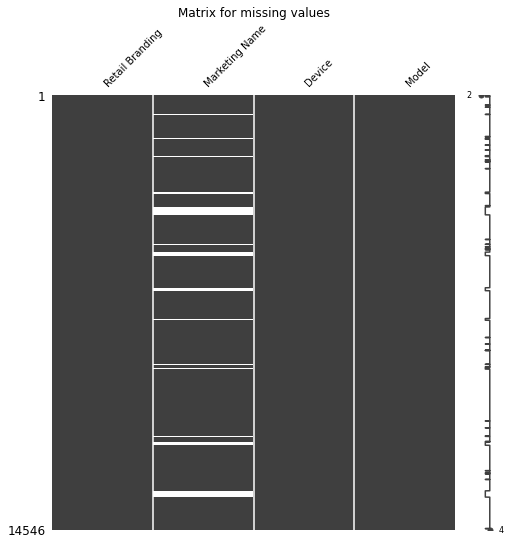

In [977]:
msno.matrix(df_device,figsize=(8,8),fontsize=10)
plt.title('Matrix for missing values')
plt.show()

In [978]:
df_missing=df_device[df_device['Marketing Name'].isna()]

In [979]:
df_missing['Retail Branding'].value_counts()

Huawei                                  265
ZTE                                     212
LGE                                     118
TCT (Alcatel)                           101
Lenovo                                  100
Motorola                                 60
Hisense                                  48
Samsung                                  47
Coolpad                                  36
Foxconn                                  32
Sony Ericsson                            19
Acer                                     12
Dell                                     12
Enspert                                   9
Compal                                    8
Sony                                      7
Quanta                                    6
KT Tech                                   6
Asus                                      5
HTC                                       5
Intel                                     5
ViewSonic                                 5
Sharp                           

In [980]:
df_missing.describe()

,Retail Branding,Marketing Name,Device,Model
count,1167,0,1171,1171
unique,43,0,853,1004
top,Huawei,NaN,msm7225,LG-P920
freq,265,NaN,18,16


In [981]:
df_device['Retail Branding'].value_counts()

Samsung          1762
ZTE              1155
Huawei           1057
LGE              1042
TCT (Alcatel)     930
                 ... 
iDea USA            1
Mobily              1
Next Learning       1
Kennex              1
Razer               1
Name: Retail Branding, Length: 605, dtype: int64

## Use of Custom function

In [982]:
# Custom Function to handle missing values

def missing_values(frame,col):
    '''This function helps to fill in the missing values
    frame : Dataframe which consists of missing value
    col   : Column of dataframe which consist of missing value'''
    name =[x for x in globals() if globals()[x] is frame][0]  
    print('Filling missing values for column {0} in Dataframe {1}: '.format(col,name))
    if frame[col].dtypes=='object':
        frame[col]=frame[col].fillna(frame[col].value_counts().index[0])
    print('Number of remaining missing values in column {0} in Dataframe {1} is : {2} '.format(col,name,frame[col].isna().sum()))
    

In [983]:
missing_values(df_device,'Retail Branding')

Filling missing values for column Retail Branding in Dataframe df_device: 
Number of remaining missing values in column Retail Branding in Dataframe df_device is : 0 


In [984]:
missing_values(df_device,'Marketing Name')

Filling missing values for column Marketing Name in Dataframe df_device: 
Number of remaining missing values in column Marketing Name in Dataframe df_device is : 0 


In [985]:
df_device.isna().sum()

Retail Branding    0
Marketing Name     0
Device             0
Model              0
dtype: int64

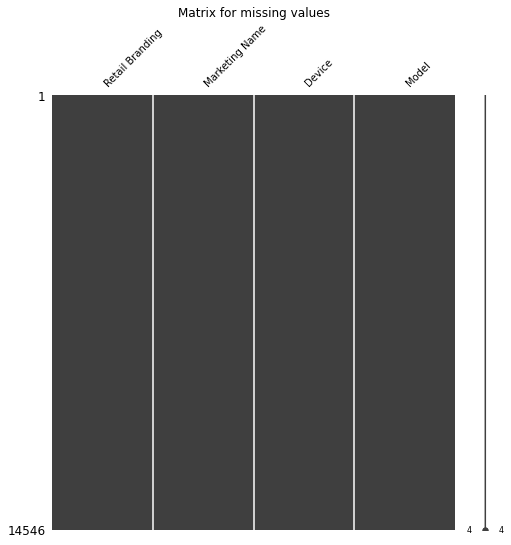

In [986]:
msno.matrix(df_device,figsize=(8,8),fontsize=10)
plt.title('Matrix for missing values')
plt.show()

In [987]:
df_device.head(10)

,Retail Branding,Marketing Name,Device,Model
0,Samsung,Galaxy S3,AD681H,Smartfren Andromax AD681H
1,Samsung,Galaxy S3,FJL21,FJL21
2,Samsung,Galaxy S3,T31,Panasonic T31
3,Samsung,Galaxy S3,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


# Use of REGEX:
<p>The below regex expression searches for a letter/word followed by a space or '-'</p> in column 'Model'
<p>Then it extracts a single letter followed by one or more digit , in parenthesis (), and fill in the values of column 'model_number'</p>
<p> The rows where the above format could not be found are filled with Nan in column 'model_number'</p>

In [988]:
df_device['model_number(Regex)']=df_device['Model'].str.extract('\w+\W(\w\d+)')

In [989]:
df_device[~df_device['model_number(Regex)'].isna()].sample(10)

,Retail Branding,Marketing Name,Device,Model,model_number(Regex)
10669,Samsung,Galaxy Tab4 10.0,matisseltevzw,SM-T537V,T537
6665,Lenovo,Lenovo A3300,A3300-T,Lenovo A3300-T,A3300
10067,Samsung,Galaxy S,GT-I9000B,GT-I9000B,I9000
6616,Lenovo,IdeaTab A3000,A3000,IdeaTab A3000-H,A3000
3238,Hipstreet,Hipstreet HS-10DTB8,HS-10DTB8,HS-10DTB8,10
3244,Hipstreet,LS-6001,LS-6001,LS-6001,6001
597,Archos,Bush 5 4G,ac50heplus,"Bush Spira C2 5"" Smartphone",C2
3130,Haier,HS-10DTB4,HS-10DTB4,HS-10DTB4,10
5600,LGE,LG G Flex2,z2,LG-H959,H959
3316,Hisense,C30,HS8937QC,Hisense C30_02,C30



<p><img src="https://www.freepnglogos.com/uploads/the-end-png/the-end-the-tragic-story-behind-regenschirm-laboratory-bio-lab-18.png" alt="Project Image Record" width="300px"></p>